<h1>Demonstrating Benford's Law</h1>

<p>
In this notebook, We will quickly go through an exploratory exercise to demonstrate Benford's Law using Yahoo Finance data.
</p>

<p>
Benford's Law is an intriguing phenomenon that I heard of in the past and always wanted to check it out for myself. This mathematical law has many applications, probably most well known to be used in Fraud Detection.
</p>


<h4>Quick explanation</h4>

<p>
Imagine you have a large list of numbers, whether it is your own personal bank transactions, stock prices, bills, street addresses, mathematical constants, population counts, etc... you name it. Now, consider the leading digits for those numbers, which will be one of these digits: 1, 2, 3, 4, 5, 6, 7, 8, or 9. One might imagine the distribution of these leading digits are equal, with ~11.11% chance for each digit. Turns out, this assumption is incorrect, and we will use real data to see for ourselves!
</p>

<p>Essentially, this is a mathematical law that describes frequency distribution of leading digits in many real-life numeric data. You can read more about <a href="https://en.wikipedia.org/wiki/Benford%27s_law">Benford's Law</a> from its Wikipedia article</p>

<p>
I was reminded of Benford's Law after listening to a <a href="https://www.udacity.com/podcasts/linear-digressions">Linear Digressions</a> <a href="http://www.stitcher.com/podcast/linear-digressions/e/benfords-law-41309967">podcast</a>. (I love this podcast by the way, I highly recommend it! Especially if you are interested in Data Science)
</p>

<h4>In this exercise...</h4>

<p>We will download a large set of numeric data, using Yahoo finance data. Then tally up the leading digits to get a distribution, and plot the frequencies.</p>

<p>The tools we will utilize include bs4 for webscraping and pandas easy data manipulation. I found a great post from <a href="http://www.thealgoengineer.com/">"The Algo Engineer"</a> on downloading S&P 500 tickers and quote data in this post: <a href="http://www.thealgoengineer.com/2014/download_sp500_data/">Downloading S&P 500 tickers and data using Python</a>, which I adapted to suit our needs. Many thanks to Dr. Aidan O'Mahony for providing a quick tutorial on obtaining finance ticker data.</p>

<p> Let's get right to it!</p>

<h3>python imports</h3>

In [1]:
import urllib2
import pytz
import pandas as pd
from pandas_datareader import data as pd_data
from bs4 import BeautifulSoup
from datetime import datetime

<h5>Obtaining numeric data</h5>

In [2]:
START = datetime(1900, 1, 1, 0, 0, 0, 0, pytz.utc)
END = datetime.today().utcnow()

In [3]:
def get_SP500_tickers(site):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = urllib2.Request(site, headers=hdr)
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page, 'lxml')

    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr'):
        col = row.findAll('td')
        if len(col) > 0:
            ticker = str(col[0].string.strip())
            tickers.append(ticker)
    return tickers

In [4]:
tickers = get_SP500_tickers("http://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

We got a list of tickers in a neat little list. Cool!

In [5]:
tickers[:5]

['MMM', 'ABT', 'ABBV', 'ACN', 'ACE']

Now let's get ticker data using DataReader (this module was originally part of pandas.io.data, but now separate modules as part of pandas_datareader. <b>WARNING!</b> The step below will take awhile! we are downloading lots of financial data!

In [6]:
ticker_data = pd_data.DataReader(tickers, 'yahoo', START, END)

Pandas DataReader returns a Pandas panel (3d dataframe).

In [7]:
ticker_data[:5]

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 13569 (major_axis) x 505 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 1962-01-02 00:00:00 to 2015-11-20 00:00:00
Minor_axis axis: A to ZTS

In [8]:
ticker_data.items

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

In [9]:
ticker_data.major_axis

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15', 
               ...
               '2015-11-09', '2015-11-10', '2015-11-11', '2015-11-12',
               '2015-11-13', '2015-11-16', '2015-11-17', '2015-11-18',
               '2015-11-19', '2015-11-20'],
              dtype='datetime64[ns]', name=u'Date', length=13569, freq=None, tz=None)

In [10]:
ticker_data.minor_axis

Index([u'A', u'AA', u'AAL', u'AAP', u'AAPL', u'ABBV', u'ABC', u'ABT', u'ACE',
       u'ACN', 
       ...
       u'XLNX', u'XOM', u'XRAY', u'XRX', u'XYL', u'YHOO', u'YUM', u'ZBH',
       u'ZION', u'ZTS'],
      dtype='object', length=505)

<b>Let's check out Yahoo's volume data:</b>

In [28]:
df = ticker_data['Volume']

In [12]:
df.tail()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACE,ACN,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-16,2478200,33638800,10139800,1488300,37651000,6908500,1829000,6348300,1744400,4141800,...,1739000,14005500,705400,14292800,1467900,10977700,3431100,777800,2505600,3521500
2015-11-17,7679500,34652200,9549300,1165300,27254000,8167100,2312500,5752100,2208300,2898700,...,2469900,10000800,818700,11703700,1600500,10231700,5051600,698700,1988400,3625500
2015-11-18,6582000,23677500,11042900,780000,46163400,5454100,1985000,5684000,1149000,2436900,...,2829300,10808000,670600,13194400,1771800,10759400,4708000,1233800,2873800,3329900
2015-11-19,7274500,32449500,6535200,679700,42908200,5342500,2044100,6790100,1547100,2526500,...,1859500,9432300,642100,6616000,1137400,13977800,3171900,1051100,1484300,2918500
2015-11-20,5447900,24898400,5498300,724400,34103500,7280900,2298500,6684100,2154300,3373900,...,1271600,10099200,880900,10214000,1300900,12482600,4257300,1642900,2092400,3661500


In this DataFrame, we have <b>dates</b> as the index and <b>tickers</b> as the columns. Let's write a quick counting function to aggregate counts:
<li> converting numbers into string </li>
<li> getting leading digit</li>
<li> tallying up the leading digits </li>

In [13]:
def count_lead_digits( lst ):
    d = {}
    for number in lst:
        digit = str(number)[0]
        if digit != '0':  # we are ignoring decimals, such as '0.95'
            if digit not in d:
                d[digit] = 0
            d[digit] += 1
    return d

In [14]:
lead_digit_counts = { str(n): 0 for n in range(1,10)}

for t in df.columns:
    prices = df[t].dropna()
    d = count_lead_digits( prices )
    for digit, count in d.items():
        lead_digit_counts[digit] += count

In [15]:
lead_digit_counts

{'1': 961889,
 '2': 571952,
 '3': 409098,
 '4': 315469,
 '5': 255722,
 '6': 214944,
 '7': 185206,
 '8': 162867,
 '9': 145234}

In [19]:
df_counts = pd.DataFrame.from_dict(lead_digit_counts, orient='index')
df_counts.columns = ['frequency']
df_counts.sort_index(inplace=True)

In [21]:
df_counts

,frequency
1,961889
2,571952
3,409098
4,315469
5,255722
6,214944
7,185206
8,162867
9,145234


<h3>plotting the data</h3>

In [22]:
%matplotlib inline
import seaborn as sns

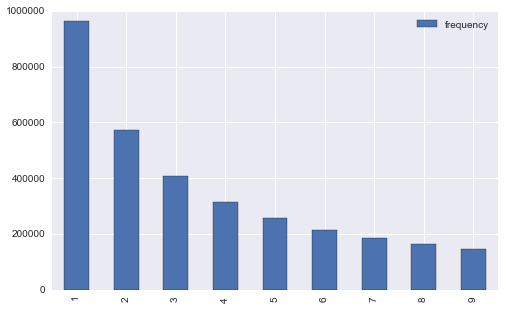

In [23]:
df_counts.plot(kind='bar', figsize=(8,5))

Pretty awesome! The distribution is almost picture perfect

In [25]:
total_count = df_counts['frequency'].sum()
df_counts['percentage'] = df_counts['frequency'] / total_count

In [26]:
df_counts

,frequency,percentage
1,961889,0.298503
2,571952,0.177494
3,409098,0.126955
4,315469,0.097899
5,255722,0.079358
6,214944,0.066703
7,185206,0.057475
8,162867,0.050542
9,145234,0.045070


Benford's Law, according to the Wikipedia page, says distribution is as follows:

<table align="left">
    <thead>
        <td>digit</td>
        <td>percentage</td>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>30.1%</td>
        </tr>
        <tr>
            <td>2</td>
            <td>17.6%</td>
        </tr>
        <tr>
            <td>3</td>
            <td>12.5%</td>
        </tr>
        <tr>
            <td>4</td>
            <td>9.7%</td>
        </tr>
        <tr>
            <td>5</td>
            <td>7.9%</td>
        </tr>
        <tr>
            <td>6</td>
            <td>6.7%</td>
        </tr>
        <tr>
            <td>7</td>
            <td>5.8%</td>
        </tr>
        <tr>
            <td>8</td>
            <td>5.1%</td>
        </tr>
        <tr>
            <td>9</td>
            <td>4.6%</td>
        </tr>
    </tbody>
</table>

Pretty darn close with our Yahoo trade volume data, huh? Fantastic!

Packaging up our previous code for more streamlined approach:

In [32]:
def get_count_df( df ):
    lead_digit_counts = { str(n): 0 for n in range(1,10)}
    
    for t in df.columns:
        prices = df[t].dropna()
        d = count_lead_digits( prices )
        for digit, count in d.items():
            lead_digit_counts[digit] += count
    
    df_counts = pd.DataFrame.from_dict(lead_digit_counts, orient='index')
    df_counts.columns = ['frequency']
    df_counts.sort_index(inplace=True)
    return df_counts

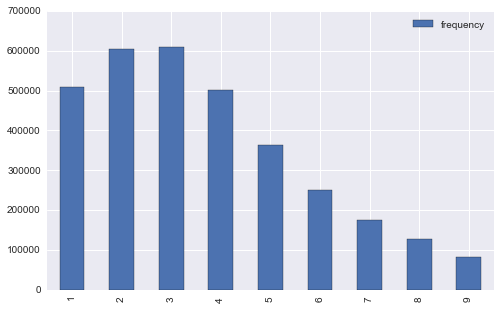

In [42]:
df2 = ticker_data['Close']
df2_counts = get_count_df( df2 )
df2_counts.plot(kind='bar', figsize=(8,5))

In [44]:
total_count = df2_counts['frequency'].sum()
df2_counts['percentage'] = df2_counts['frequency'] / total_count

In [45]:
df2_counts

,frequency,percentage
1,509925,0.158149
2,603659,0.187220
3,610367,0.189301
4,501494,0.155535
5,363726,0.112807
6,250985,0.077841
7,175331,0.054378
8,126301,0.039171
9,82538,0.025599


Hmm, looks like distribution for stock prices don't quite hold for stock prices. This is worth looking into.

Let's investigate another data source. This time, we'll check out a <a href="http://www.ebyte.it/library/educards/constants/ConstantsOfPhysicsAndMath.html">list of Physics and Match Constants</a>.

In [75]:
def get_constants_data( site ):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = urllib2.Request(site, headers=hdr)
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page, 'lxml')
    
    constants = []
    for row in soup.findAll('td', {'class': 'boxa'}):
        txt = row.text.strip()
        for c in ['+','-']:
            txt = txt.replace(c, "").strip()

        constants.append(txt)
    
    return constants

In [76]:
constants = get_constants_data( "http://www.ebyte.it/library/educards/constants/ConstantsOfPhysicsAndMath.html" )

In [86]:
constants_digits = [ x[0] for x in constants if x[0].isdigit() ]
constants_count = {}
for digit in constants_digits:
    if digit != '0':
        if digit not in constants_count:
            constants_count[digit] = 0
        constants_count[digit] += 1

In [87]:
constants_count

{u'1': 105,
 u'2': 61,
 u'3': 40,
 u'4': 36,
 u'5': 24,
 u'6': 19,
 u'7': 9,
 u'8': 16,
 u'9': 21}

In [88]:
df3_counts = pd.DataFrame.from_dict(constants_count, orient='index')
df3_counts.columns = ['frequency']
df3_counts.sort_index(inplace=True)

In [90]:
df3_counts

,frequency
1,105
2,61
3,40
4,36
5,24
6,19
7,9
8,16
9,21


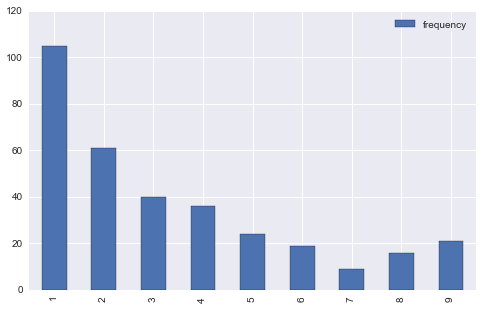

In [91]:
df3_counts.plot(kind='bar', figsize=(8,5))